# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Shofia Nurul Huda
- **Email:** shofia_nh@mhs.usk.ac.id
- **ID Dicoding:** MC322D5X2288

## Menentukan Pertanyaan Bisnis

- Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Apakah ada perbedaan tren peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [56]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [57]:
df_hour = pd.read_csv('data/hour.csv')
df_day = pd.read_csv('data/day.csv')

# Gabungkan data berdasarkan tanggal
df_main = df_hour.merge(df_day.drop(columns=['instant', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']), on='dteday', how='left')

df_main.drop(columns=['season_x', 'holiday_x'], inplace=True)
df_main.rename(columns={'season_y': 'season', 'holiday_y': 'holiday'}, inplace=True)

# Simpan dataset gabungan
df_main.to_csv('dashboard/main_data.csv', index=False)

In [58]:
df_main = pd.read_csv('dashboard/main_data.csv')
print(df_main)

       instant      dteday  yr  mnth  hr  weekday  workingday  weathersit  \
0            1  2011-01-01   0     1   0        6           0           1   
1            2  2011-01-01   0     1   1        6           0           1   
2            3  2011-01-01   0     1   2        6           0           1   
3            4  2011-01-01   0     1   3        6           0           1   
4            5  2011-01-01   0     1   4        6           0           1   
...        ...         ...  ..   ...  ..      ...         ...         ...   
17374    17375  2012-12-31   1    12  19        1           1           2   
17375    17376  2012-12-31   1    12  20        1           1           2   
17376    17377  2012-12-31   1    12  21        1           1           1   
17377    17378  2012-12-31   1    12  22        1           1           1   
17378    17379  2012-12-31   1    12  23        1           1           1   

       temp   atemp   hum  windspeed  casual  registered  cnt  season  holi

**Insight:**
- Dataset telah digabungkan berdasarkan tanggal, dengan menghapus kolom redundan dan mengganti beberapa variabel dari df_day.
- Jumlah data tetap (17,379 baris), dengan struktur yang memungkinkan analisis per jam dan per hari.
- Informasi cuaca dan waktu tetap dipertahankan untuk melihat pengaruh faktor lingkungan terhadap penyewaan sepeda.

### Assessing Data

In [59]:
print(df_main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  season      17379 non-null  int64  
 16  holiday     17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [60]:
print(df_main.describe())

          instant            yr          mnth            hr       weekday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      3.003683   
std     5017.0295      0.500008      3.438776      6.914405      2.005771   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      1.000000   
50%     8690.0000      1.000000      7.000000     12.000000      3.000000   
75%    13034.5000      1.000000     10.000000     18.000000      5.000000   
max    17379.0000      1.000000     12.000000     23.000000      6.000000   

         workingday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      0.496987      0.475775      0.627229   
std        0.465431      0.639357      0.192556      0.171850      0.

In [61]:
print(df_main.head())

   instant      dteday  yr  mnth  hr  weekday  workingday  weathersit  temp  \
0        1  2011-01-01   0     1   0        6           0           1  0.24   
1        2  2011-01-01   0     1   1        6           0           1  0.22   
2        3  2011-01-01   0     1   2        6           0           1  0.22   
3        4  2011-01-01   0     1   3        6           0           1  0.24   
4        5  2011-01-01   0     1   4        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  season  holiday  
0  0.2879  0.81        0.0       3          13   16       1        0  
1  0.2727  0.80        0.0       8          32   40       1        0  
2  0.2727  0.80        0.0       5          27   32       1        0  
3  0.2879  0.75        0.0       3          10   13       1        0  
4  0.2879  0.75        0.0       0           1    1       1        0  


**Insight:**
- Variabel waktu cukup detail, mencakup tahun, bulan, hari, dan jam, memungkinkan analisis tren waktu dengan resolusi tinggi.
- Kolom temp, atemp, hum, dan windspeed memiliki rentang nilai antara 0-1, yang kemungkinan sudah dinormalisasi dan tidak perlu dilakukan scaling lebih lanjut.

### Cleaning Data

In [62]:
df_main.isnull().sum()

instant       0
dteday        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
season        0
holiday       0
dtype: int64

In [63]:
duplicates = df_main.duplicated().sum()
print(f'Jumlah duplikasi: {duplicates}')

Jumlah duplikasi: 0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

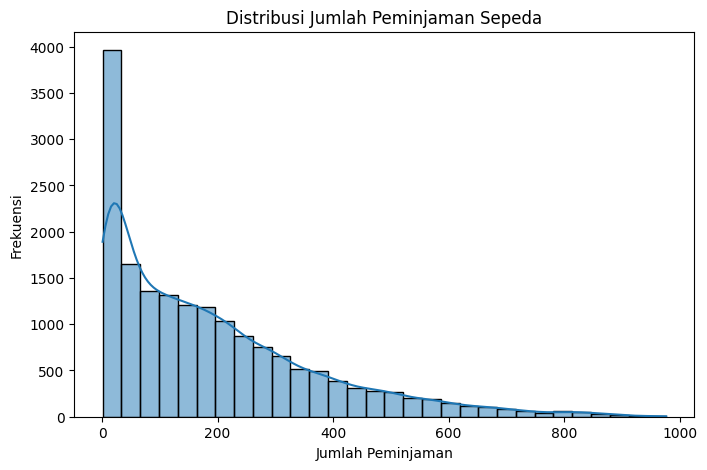

In [64]:
# Distribusi data jumlah peminjaman sepeda
plt.figure(figsize=(8, 5))
sns.histplot(df_main['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

In [65]:
# Cek skewness (kemencengan distribusi)
skewness = skew(df_main['cnt'])
print(f"Skewness: {skewness:.2f}")

Skewness: 1.28


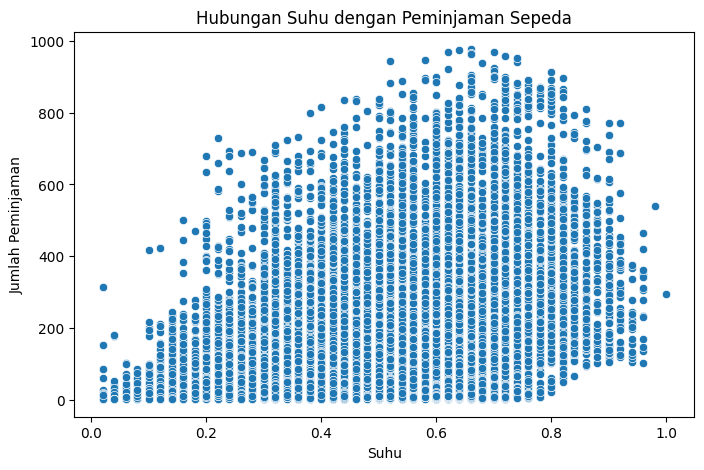

In [66]:
# Analisis Bivariat
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_main['temp'], y=df_main['cnt'])
plt.title('Hubungan Suhu dengan Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

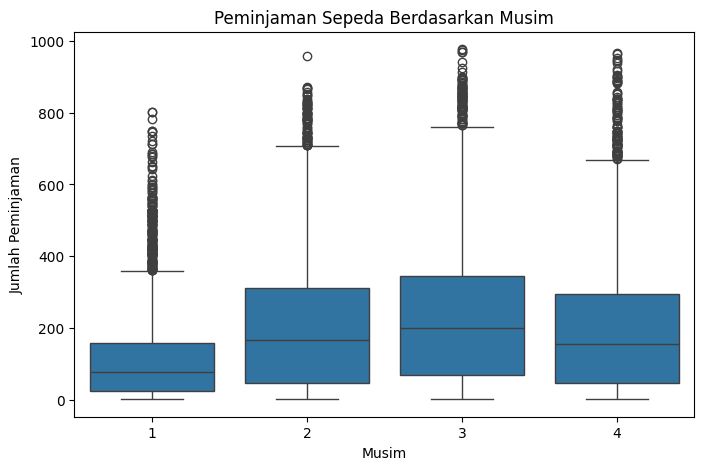

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df_main)
plt.title('Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

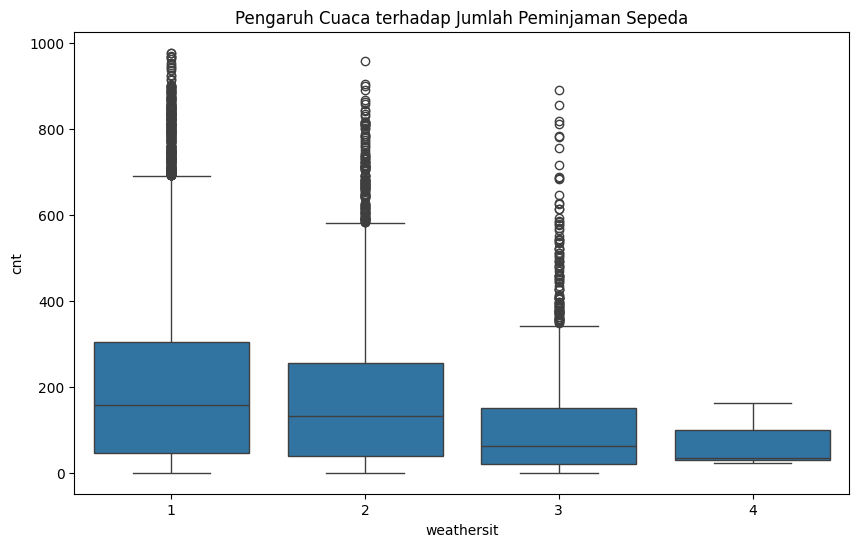

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit', y='cnt', data=df_main)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.show()

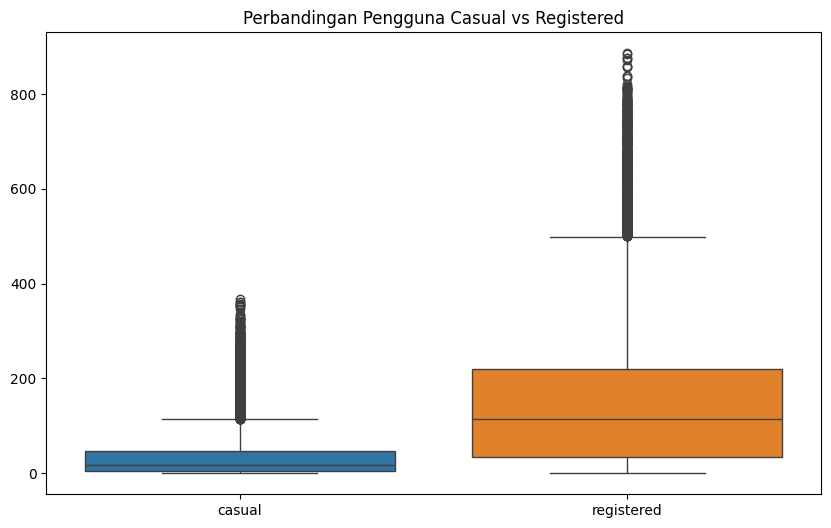

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_main[['casual', 'registered']])
plt.title('Perbandingan Pengguna Casual vs Registered')
plt.show()

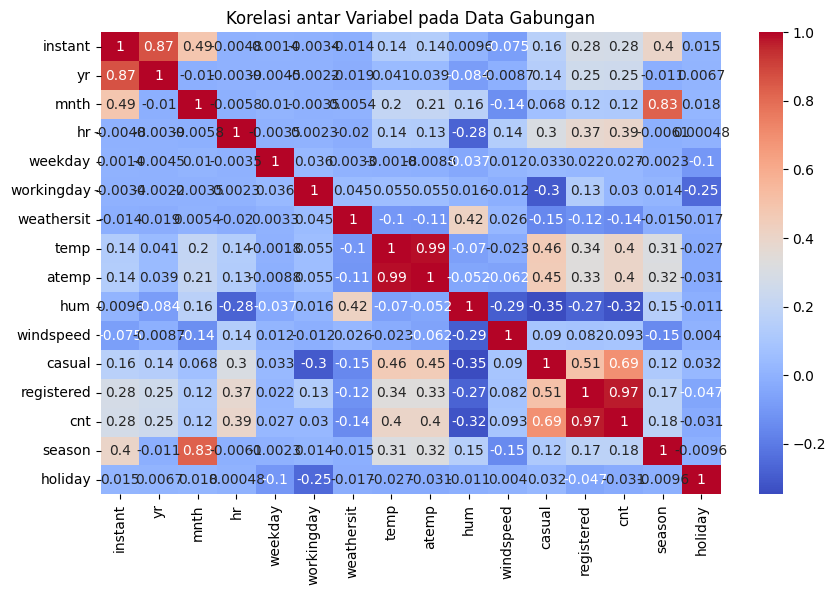

In [70]:
plt.figure(figsize=(10,6))

# Memilih hanya kolom numerik sebelum melakukan korelasi
df_corr = df_main.select_dtypes(include=['number'])

sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel pada Data Gabungan')
plt.show()


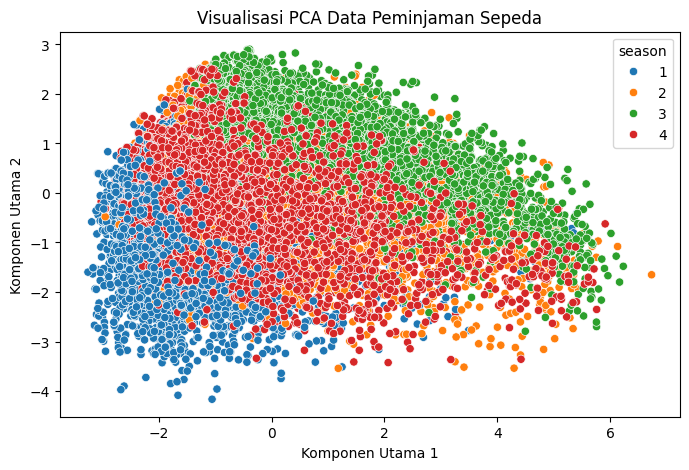

Variansi yang dijelaskan oleh PCA: [0.47645364 0.21589871]


In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
X = df_main[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_main['PCA1'] = pca_result[:, 0]
df_main['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_main['PCA1'], y=df_main['PCA2'], hue=df_main['season'], palette='tab10')
plt.title('Visualisasi PCA Data Peminjaman Sepeda')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

print(f"Variansi yang dijelaskan oleh PCA: {pca.explained_variance_ratio_}")

**Insight:**
- Cuaca sangat memengaruhi peminjaman, terutama kondisi hujan dan suhu ekstrem.
- Pengguna terdaftar (registered) mendominasi peminjaman (korelasi 0.97 dengan cnt), sementara pengguna casual lebih rendah (0.69).
- Musim dan bulan berkorelasi kuat (0.83), memengaruhi pola peminjaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa peminjaman sepeda paling tinggi dan paling rendah?

C:\Users\Sofi\AppData\Local\Temp\ipykernel_17932\2654071207.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=df_main, estimator='sum', ci=None)


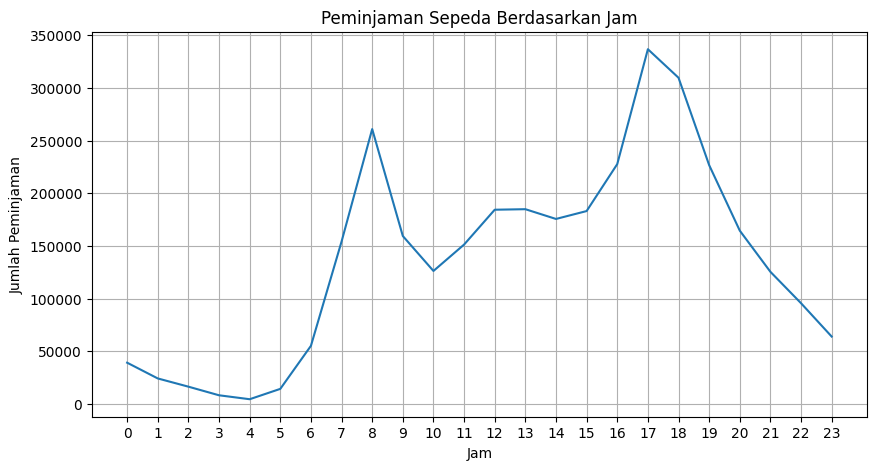

In [78]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_main, estimator='sum', ci=None)
plt.title('Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

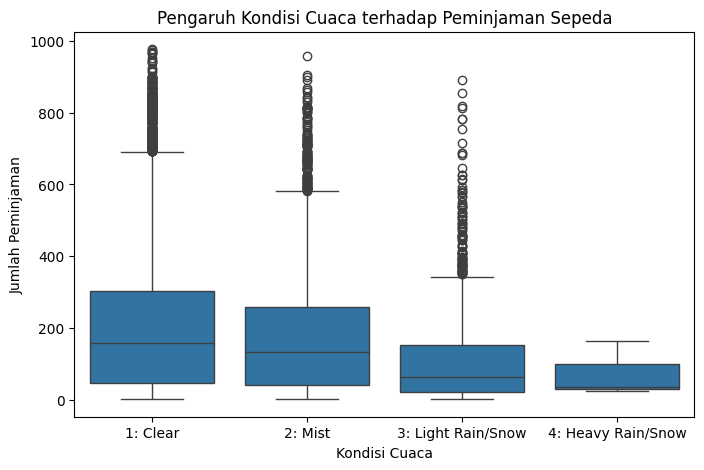

In [79]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=df_main)
plt.title('Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3], ['1: Clear', '2: Mist', '3: Light Rain/Snow', '4: Heavy Rain/Snow'])
plt.show()

### Pertanyaan 3: Apakah ada perbedaan tren peminjaman sepeda antara hari kerja dan akhir pekan?

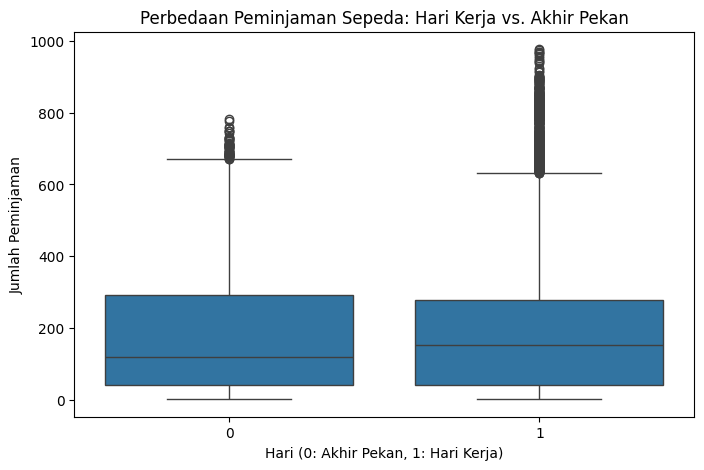

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='cnt', data=df_main)
plt.title('Perbedaan Peminjaman Sepeda: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Hari (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Pola peminjaman sepeda berdasarkan jam menunjukkan tren yang jelas – penggunaan sepeda meningkat pada jam sibuk (sekitar pukul 7-9 pagi dan 17-19 sore), kemungkinan besar karena aktivitas berangkat dan pulang kerja/sekolah.
- Kondisi cuaca berpengaruh terhadap jumlah peminjaman sepeda – peminjaman tertinggi terjadi saat cuaca cerah (weathersit=1), sedangkan hujan atau salju lebat (weathersit=4) menyebabkan penurunan drastis.
- Hari kerja vs. akhir pekan menunjukkan perbedaan pola peminjaman – pada hari kerja (workingday=1), jumlah peminjaman lebih tinggi secara umum, terutama karena kontribusi pengguna terdaftar (commuters). Sebaliknya, pada akhir pekan (workingday=0), meskipun jumlah peminjaman lebih rendah, kemungkinan besar dipengaruhi oleh pengguna kasual (rekreasi).

## Analisis Lanjutan (Opsional)

RFM Summary: {'Recency': np.int64(0), 'Frequency': np.int64(365), 'Monetary': np.int64(3292679)}


C:\Users\Sofi\AppData\Local\Temp\ipykernel_17932\357942085.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_group = df.groupby('time_category')['cnt'].mean()


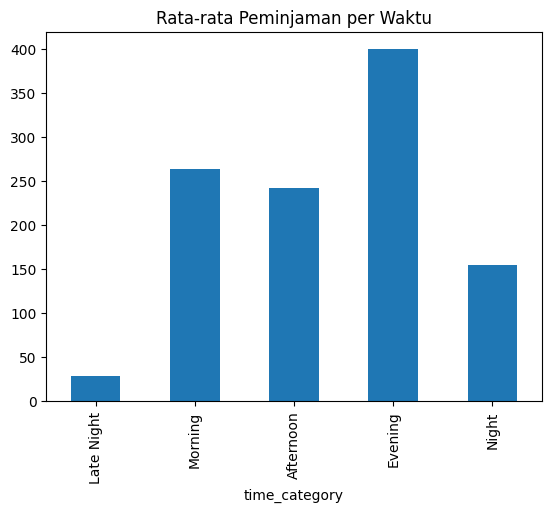

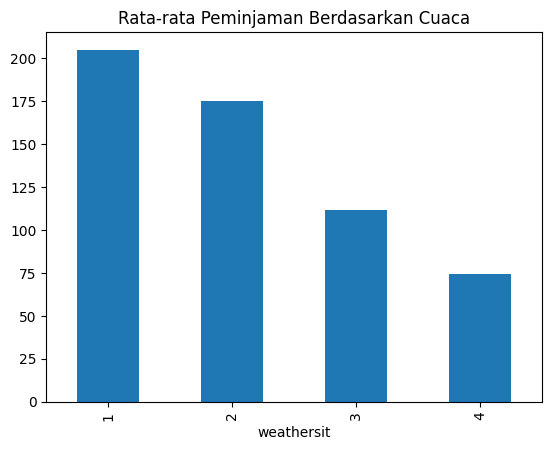

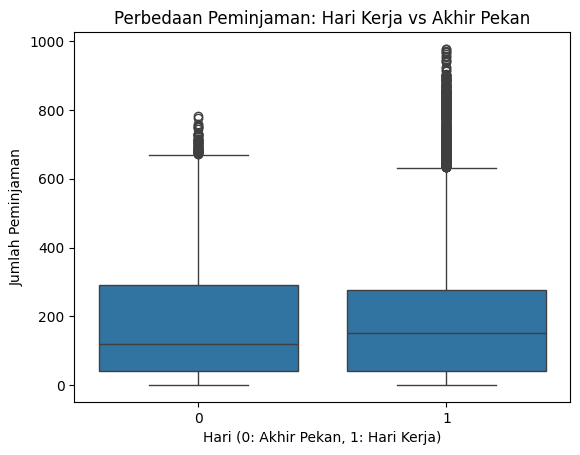

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('dashboard/main_data.csv')

# Konversi tanggal
df['dteday'] = pd.to_datetime(df['dteday'])

# === 1. RFM Analysis (Per Hari) ===
# Recency: Hari terakhir dengan peminjaman
recency = df.groupby('dteday')['cnt'].sum().reset_index()
recency['days_since_last_rent'] = (recency['dteday'].max() - recency['dteday']).dt.days

# Frequency: Jumlah hari dengan peminjaman tinggi (> threshold)
threshold = recency['cnt'].median()
frequency = (recency['cnt'] > threshold).sum()

# Monetary: Total peminjaman dalam periode
monetary = recency['cnt'].sum()

rfm_summary = {'Recency': recency['days_since_last_rent'].min(),
               'Frequency': frequency,
               'Monetary': monetary}
print("RFM Summary:", rfm_summary)

# === 2. Clustering (Binning Berdasarkan Waktu) ===
bin_labels = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['time_category'] = pd.cut(df['hr'], bins=[0,6,9,16,19,24], labels=bin_labels, ordered=False)
time_group = df.groupby('time_category')['cnt'].mean()
time_group.plot(kind='bar', title='Rata-rata Peminjaman per Waktu')
plt.show()

# === 3. Clustering Berdasarkan Cuaca ===
weather_group = df.groupby('weathersit')['cnt'].mean()
weather_group.plot(kind='bar', title='Rata-rata Peminjaman Berdasarkan Cuaca')
plt.show()

# === 4. Perbandingan Hari Kerja vs Akhir Pekan ===
sns.boxplot(x=df['workingday'], y=df['cnt'])
plt.title('Perbedaan Peminjaman: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Conclusion

Berdasarkan analisis data peminjaman sepeda, terdapat pola yang jelas dalam penggunaan sepeda yang dipengaruhi oleh faktor waktu, kondisi cuaca, dan jenis hari. Pengguna sepeda cenderung lebih banyak pada jam sibuk, saat cuaca cerah, dan pada hari kerja. Analisis ini dapat membantu dalam pengelolaan sepeda, seperti penyediaan unit sepeda yang lebih banyak pada jam dan hari tertentu.

- Conclution pertanyaan 1: Peminjaman sepeda memiliki pola yang mengikuti aktivitas harian masyarakat. Terdapat dua puncak peminjaman utama, yaitu pada pagi hari sekitar pukul 7-9 dan sore hari sekitar pukul 17-19. Pola ini menunjukkan bahwa sepeda banyak digunakan untuk perjalanan kerja atau sekolah.
- Conclution pertanyaan 2: Kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda. Saat cuaca cerah, jumlah peminjaman lebih tinggi, sedangkan pada kondisi hujan atau salju lebat, peminjaman menurun drastis. Hal ini menunjukkan bahwa kenyamanan dan keamanan saat berkendara sangat mempengaruhi keputusan pengguna untuk meminjam sepeda.
- Conclusion pertanyaan 3: Perbedaan pola peminjaman juga terlihat antara hari kerja dan akhir pekan. Pada hari kerja, peminjaman lebih tinggi, terutama oleh pengguna terdaftar yang kemungkinan besar adalah pekerja atau pelajar. Sementara itu, pada akhir pekan, peminjaman lebih rendah, tetapi cenderung didominasi oleh pengguna kasual yang menggunakan sepeda untuk keperluan rekreasi.